In [63]:
import  rattle_newton.sim_snake_tb as therma_sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import math
import matplotlib.dates as mdates

In [16]:
## Simulate a Year
# Set the starting date and time
start_time = datetime(year=2023, month=1, day=1, hour=0, minute=0)

# Set the time interval
time_interval = timedelta(minutes=15)

# Set the number of intervals in a day
intervals_per_day = 24 * 60 // 15

# Set the number of days in a year
days_in_year = 365

time_series=[]
# Simulate a whole year
current_time = start_time
for day in range(days_in_year):
    for interval in range(intervals_per_day):
        time_series.append(current_time.strftime('%Y-%m-%d %H:%M:%S'))
        current_time += time_interval
        

In [26]:
## Simulate environmental conditions
# Parameters
amplitude = (40 - 10) / 2  # 40 degrees c
offset = (40 + 10) / 2  # 10 degrees c

# Time values (assuming one cycle per day)
_time = np.arange(0, len(time_series))

## Outside Temp
# simulated with a sin function with that oscilates between 40 degrees and 10
outside_temp = amplitude * np.sin(2 * np.pi * _time / 360) + offset 

## Burrow Temp
# constant 20 degrees
burrow_temp = [20 for t in _time]

In [27]:
max(outside_temp)

40.0

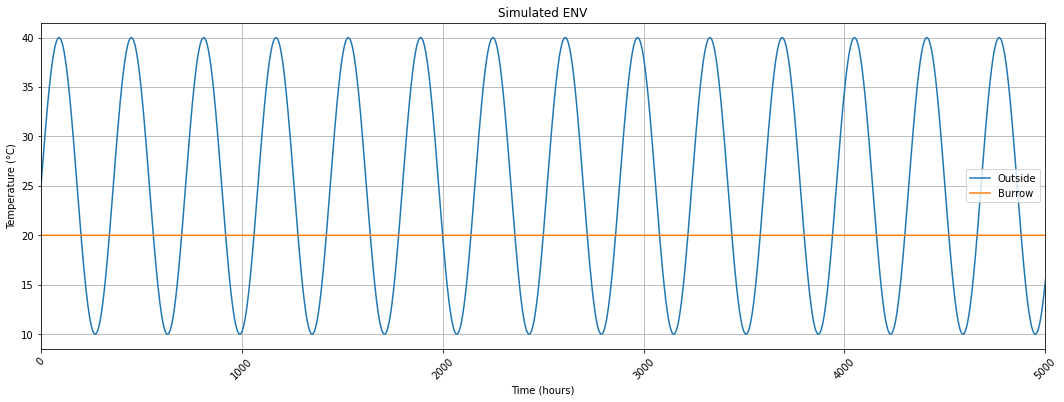

In [37]:
plt.figure(figsize=(18, 6))
plt.plot(_time, outside_temp,label='Outside')
plt.plot(_time, burrow_temp,label='Burrow')
plt.title('Simulated ENV')
plt.xlabel('Time (15 minute intervals)')
plt.ylabel('Temperature (°C)')
plt.xlim(0,5000)

plt.grid(True)
plt.legend()
plt.xticks(rotation=45) 
plt.show()

In [44]:
# Make a dataframe
df = pd.DataFrame({
    'time_series': time_series,
    'time_steps':_time,
    'open_temp': outside_temp,
    'burrow_temp': burrow_temp
})
df.head()

time_series  time_steps  open_temp  burrow_temp
0  2023-01-01 00:00:00           0  25.000000           20
1  2023-01-01 00:15:00           1  25.261786           20
2  2023-01-01 00:30:00           2  25.523492           20
3  2023-01-01 00:45:00           3  25.785039           20
4  2023-01-01 01:00:00           4  26.046347           20

In [47]:
import plotly.express as px

# Create the line plot with different colors
fig = px.line(df, x='time_series',
              y=['open_temp', 'burrow_temp'],
              color_discrete_map={'open_temp': 'red', 'burrow_temp': 'green'})

# Show the figure
fig.show()

In [64]:
# Simulate ectotherm
k=0.0005
t_crit_max = 35
t_pref_max = 31 
t_pref_min = 18 
t_crit_min = 12
t_initial = 25

ts = therma_sim.thermal_simulator()

burrow_usage, tb_sim = ts.tb_simulator_2_state_model(
                                       k=k, t_initial=t_initial,
                                       t_pref_min= t_pref_min, t_pref_max=t_pref_max,
                                       burrow_temp_vector=df['burrow_temp'], open_temp_vector=df['open_temp'],
                                       t_crit_min=t_crit_min, t_crit_max=t_crit_max,
                                       return_tbody_sim=True)
df['burrow_usage'] = burrow_usage
df['tb_sim'] = tb_sim
df.head()

NameError: name 'coolong_eq_k' is not defined